<a href="https://colab.research.google.com/github/Morgoth636/ML_WS22-23/blob/main/ML_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banknote Dataset: Support Vector Machine/Binary Classification


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

loading the dataset...

In [3]:
url = "https://raw.githubusercontent.com/Morgoth636/ML_WS22-23/main/BankNote_Authentication.csv"
df = pd.read_csv(url)


splitting the dataset in train data and test data with 20% test data and 80% training data

In [4]:
y = df["class"]
X = df.loc[:, df.columns != "class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

setting up the classifier model and fitting the model to the training data...

In [5]:
from sklearn import metrics
clf = SVC(gamma = "auto")
clf.fit(X_train, y_train)

SVC(gamma='auto')

predicting on the test dataset...

In [6]:
y_pred = clf.predict(X_test)

creating and plotting the confusion matrix for the classifier...

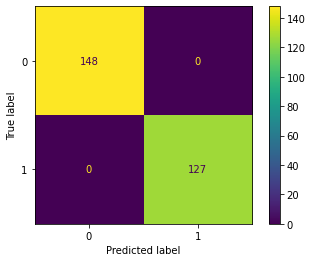

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [8]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('\n')
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('\n')
print('F1: %.3f' % f1_score(y_test, y_pred))
print('\n')
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 1.000


Recall: 1.000


F1: 1.000


Accuracy: 1.000


#Wine Dataset: Multi Layer Perceptron/Multiclass Classification

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, scale
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [10]:
model = Sequential()
model.add(Dense(32, input_dim=11, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(11, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer= Adam(learning_rate=1e-3), metrics = ["accuracy"])


In [11]:
def load_dataset(red):
  if red:
    url = "https://raw.githubusercontent.com/Morgoth636/ML_WS22-23/main/winequality-red.csv"
    df = pd.read_csv(url)
    y = df["quality"]
    X = df.loc[:, df.columns != "quality"]
    X = scale(X)
    return X, y
  else:
    url = "https://raw.githubusercontent.com/Morgoth636/ML_WS22-23/main/winequality-white.csv"
    df = pd.read_csv( url, sep = ";")
    y = df["quality"]
    X = df.loc[:, df.columns != "quality"]
    X = scale(X)
    return X, y

In [12]:
X, y = load_dataset(red=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=11)
y_test = to_categorical(y_test, num_classes=11)
model.fit(X_train, y_train, epochs=200)
  

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 2.2028 - accuracy: 0.2807
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 1.6313 - accuracy: 0.4386
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 1.3221 - accuracy: 0.4965
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 1.2181 - accuracy: 0.5231
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 1.1723 - accuracy: 0.5215
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 1.1185 - accuracy: 0.5434
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0892 - accuracy: 0.5512
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0952 - accuracy: 0.5317
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0749 - accuracy: 0.5668
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0662 - accuracy: 0.5457
Epoch 11/

In [13]:
results = model.evaluate(X_test, y_test)


10/10 [==============================] - 0s 2ms/step - loss: 0.8508 - accuracy: 0.6125
